# 1. K-NN classifier


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, load the required packages:

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import copy

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [3]:
def read_data(path):
    df = pd.read_csv(path)
    dx = df.drop(columns=['status'])
    dx.drop(columns='name', inplace=True)
    return dx, df.loc[:,'status']

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [4]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

# Analyse the given data. 
 How many attributes are in given data

In [7]:
print('Attributes: ', data_X.shape[1])

Attributes:  22


In [8]:
data_X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


* Are observations equally distributed for sick and healthy people?

*No, they are not*

In [9]:
df = pd.read_csv('parkinsons.data')
print(df[df.status==1].shape[0])
print(df[df.status==0].shape[0])

147
48


Plot the histogram of the assigned class and analyse the distribution.


(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

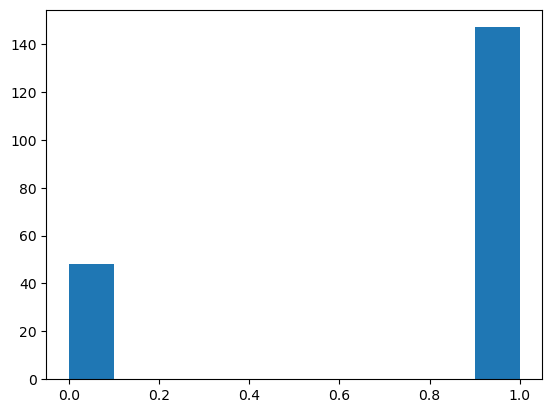

In [10]:
plt.hist(data_Y)

Plot the histograms of the first 5 attributes. 

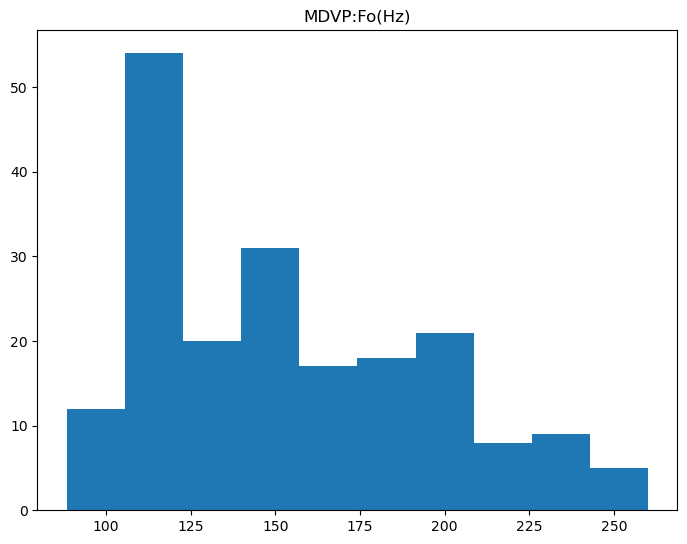

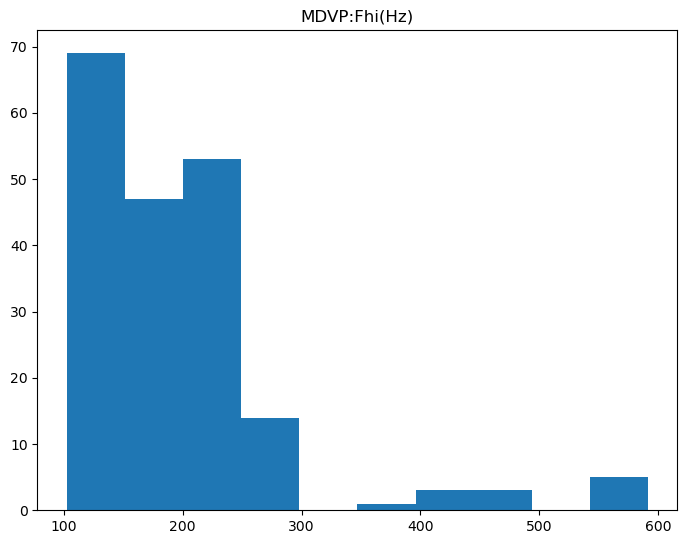

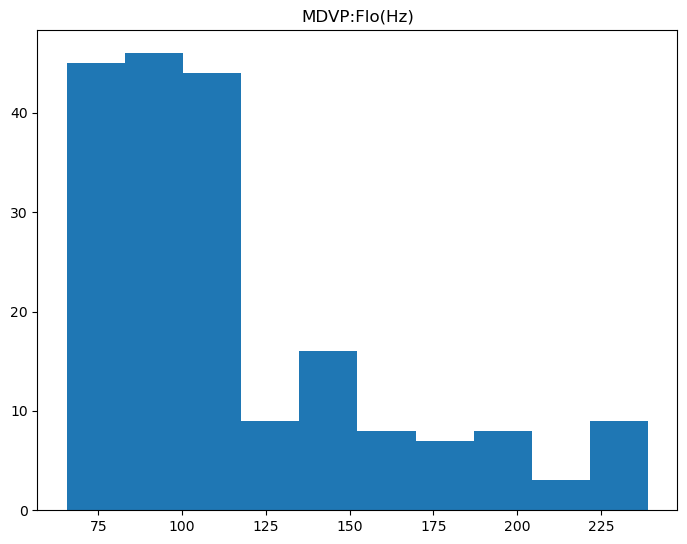

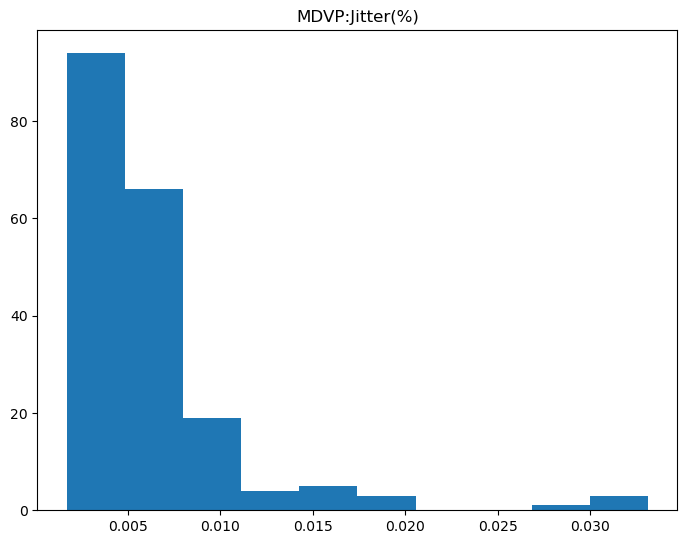

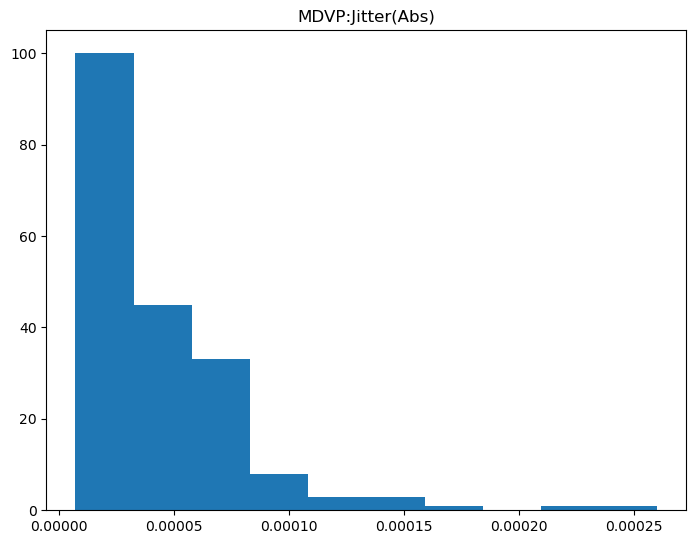

In [12]:
for i in range(5):
    f = plt.figure()
    ax = f.add_axes([0,0,1,1])
    ax.hist(data_X.iloc[:, i])
    ax.set_title(data_X.columns[i])

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [13]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=test_percent / 100, random_state=random_state)
    return X_train, Y_train, X_test, Y_test
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k):
    # Convert data to numpy arrays to ensure they are contiguous in memory
    train_data_X = np.ascontiguousarray(train_data_X)
    test_data_X = np.ascontiguousarray(test_data_X)
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_X, train_data_Y)
    pred = neigh.predict(test_data_X)
    
    return metrics.accuracy_score(test_data_Y, pred)


#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
import numpy as np

# Function to calculate classification accuracy
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k):
    # Make sure data is in a compatible format
    train_data_X = np.ascontiguousarray(train_data_X)
    test_data_X = np.ascontiguousarray(test_data_X)
    
    # Initialize the classifier with the specified number of neighbors
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_X, train_data_Y)  # Fit the model using the training data
    pred = neigh.predict(test_data_X)  # Predict the labels for the test data
    
    # Calculate and return the accuracy of the predictions
    return metrics.accuracy_score(test_data_Y, pred)

# Function to standardize training and test datasets
def standarize_train_and_test(train_X, test_X):
    # Example with MaxAbsScaler, you can switch to MinMaxScaler or StandardScaler as needed
    return (
        MaxAbsScaler().fit(train_X).transform(train_X),
        MaxAbsScaler().fit(test_X).transform(test_X)
    )

# Assuming train_X, train_Y, test_X, test_Y are defined elsewhere in your code
norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)

# Specify the number of neighbors for the k-NN classifier
k = 5

# Call the function with all required arguments including 'k'
accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k)

# Print the accuracy (uncomment the print statement below once you have defined your datasets)
print(f"Classification accuracy: {accuracy}")


Classification accuracy: 0.9743589743589743


# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

Text(0, 0.5, 'acc')

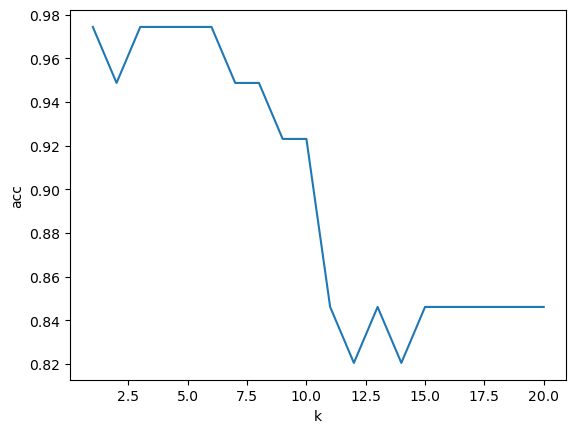

In [29]:
ks = [x for x in range(1, 21)]
accs = []
for k in ks:
    acc = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=k)
    accs.append(acc)
plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('acc')

# 6. Data Preparation
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [33]:
# Load the data
df_heart = pd.read_csv('heart.csv')

# Split the data into features and target variable
X_heart = df_heart.drop('target', axis=1)
y_heart = df_heart['target']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Standardize the features (z-score normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Choosing the Best 'k'
Using cross validation to find the best 'k' value

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of `k` to try
k_values = range(1, 21)
cross_val_scores = []

# Perform 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(np.mean(scores))

# Determine the best k value
best_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f"The best value for k is {best_k}")


The best value for k is 16


# 8. Training and Testing the k-NN Classifier
With the best 'k' value identified above, train the k-NN classifier and evaluate its performance on the test set

In [36]:
# Train the k-NN classifier with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Test the classifier on the test data
y_pred = knn_best.predict(X_test_scaled)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with k={best_k}: {accuracy}")


Classification accuracy with k=16: 0.8852459016393442


# 9. Visualising the Cross-Validation Results
Plotting the accurace for different 'k' values can give a visual representation of the classifiers performance

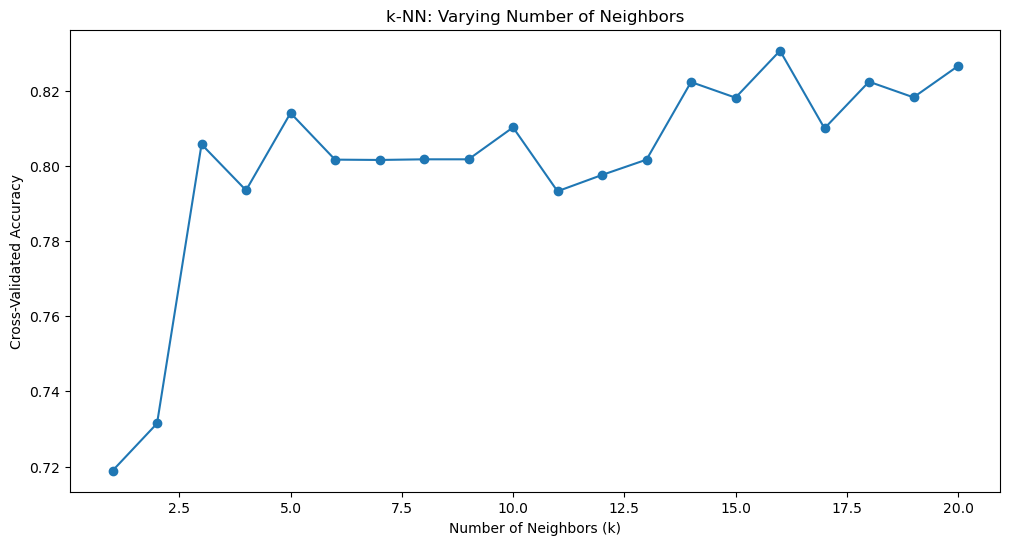

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


# 10. Dealing with Imbalanced Classes
If the classes are imbalanced, adjust the 'weights' parameter of the k-NN classifier

In [39]:
# If classes are imbalanced, consider using the 'weights' parameter
knn_balanced = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = knn_balanced.predict(X_test_scaled)

# Calculate the accuracy for the balanced model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Classification accuracy with k={best_k} (balanced weights): {accuracy_balanced}")


Classification accuracy with k=16 (balanced weights): 0.9016393442622951


# 11. Graphs
This graph will plot the cross-validated accuracy score for each value of k, allowing you to visually inspect which k gives the highest accuracy.

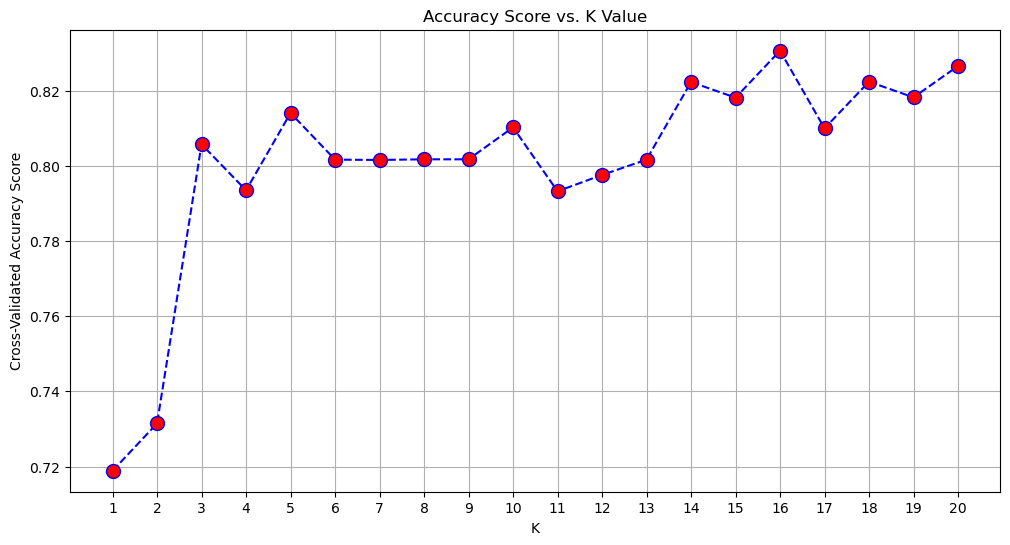

In [41]:
import matplotlib.pyplot as plt

# Assuming `cross_val_scores` contains the average cross-validation scores for each `k`
# and `k_values` contains the range of `k` values tested

plt.figure(figsize=(12, 6))
plt.plot(k_values, cross_val_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Histogram of Target Classes
This will create separate histograms for each of the first 5 attributes, allowing you to inspect the distribution of each.

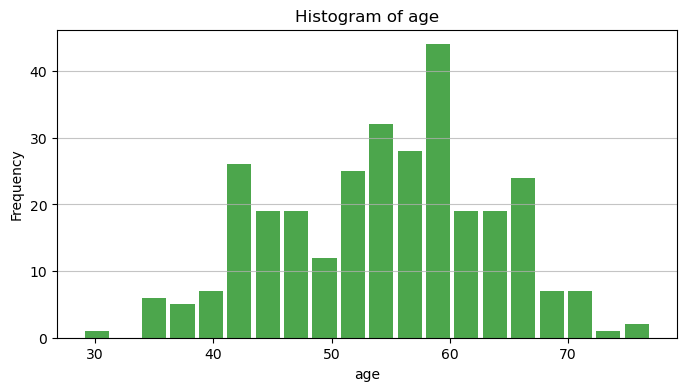

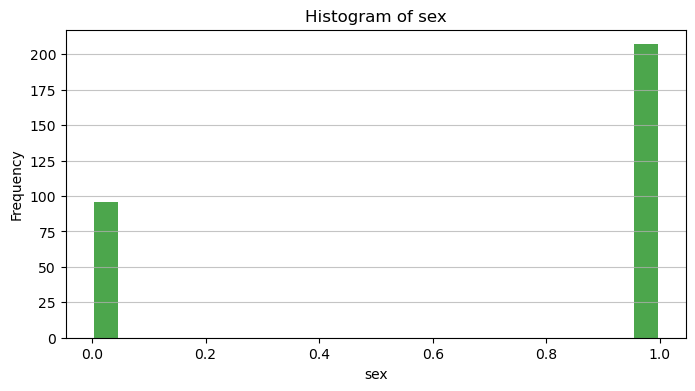

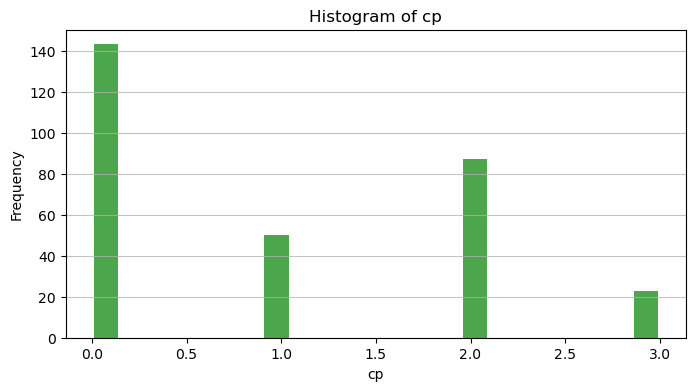

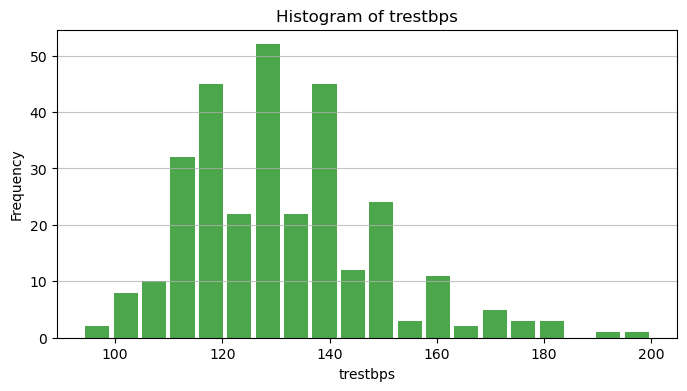

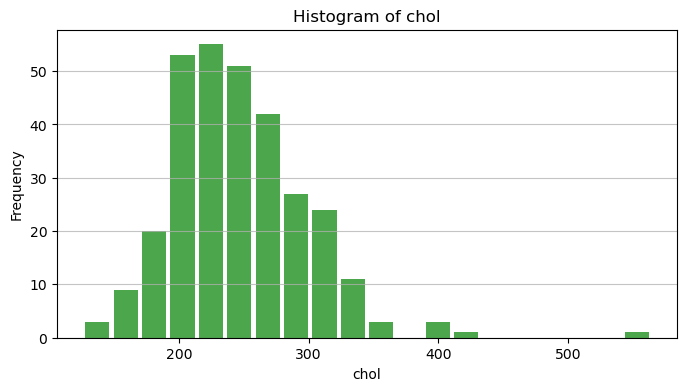

In [44]:
attributes = list(X_heart.columns[:5])  # Adjust the number as needed

for attribute in attributes:
    plt.figure(figsize=(8, 4))
    plt.hist(X_heart[attribute], bins=20, color='green', alpha=0.7, rwidth=0.85)
    plt.title(f'Histogram of {attribute}')
    plt.ylabel('Frequency')
    plt.xlabel(attribute)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


# Confusion Matrix
After training and making predictions, you can visualize the performance using a confusion matrix:
This heatmap will help you understand the true positives, true negatives, false positives, and false negatives in your classification results.

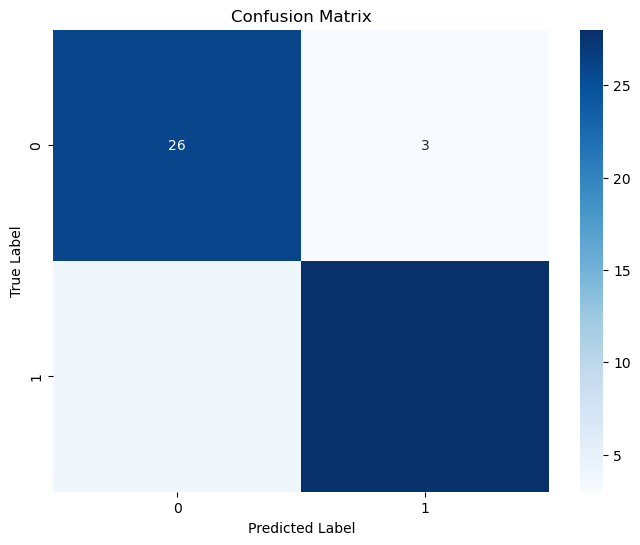

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ROC Curve
The ROC curve and the area under the curve (AUC) can provide insights into the classifier's performance across different classification thresholds.

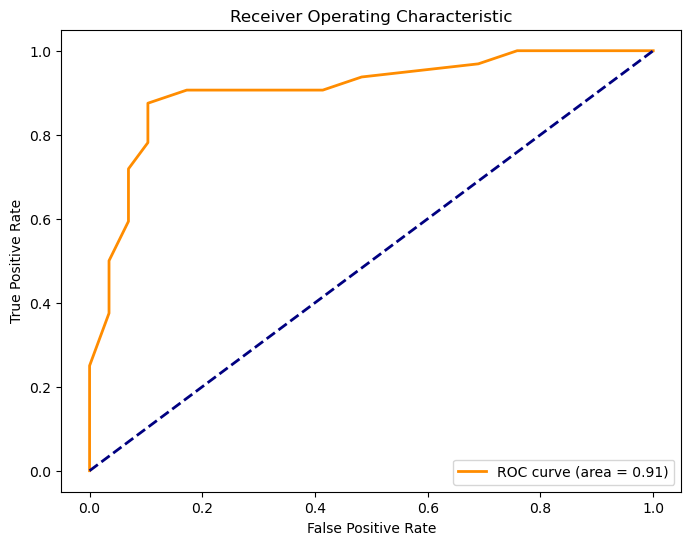

In [47]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
